In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
df_covid = pd.read_csv('country_vaccinations.csv')

In [271]:
df_date = df_covid.groupby(df_covid.date).sum()
# df_date[ df_date.date == df_date.date.max() ]
df_daily = df_date[ 'daily_vaccinations' ]
df_all = df_date[ 'people_fully_vaccinated' ]

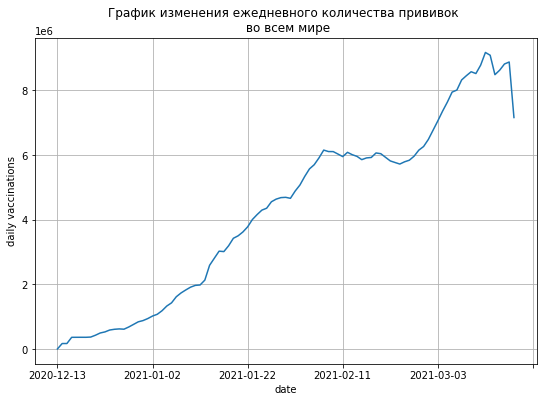

In [272]:
ax = plt.figure(figsize=(9,6))
ax = df_daily.plot(xlabel='date',
                    ylabel='daily vaccinations',
                    title='График изменения ежедневного количества прививок \n во всем мире')
ax.grid(True)

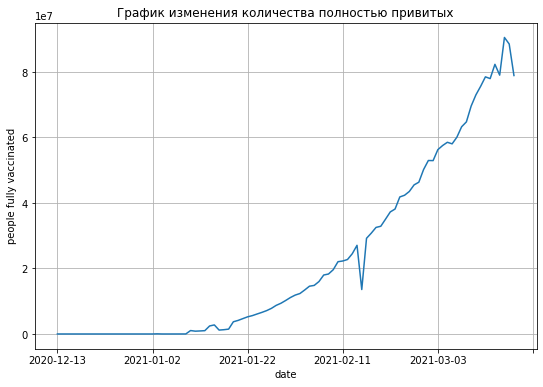

In [273]:
ax = plt.figure(figsize=(9,6))
ax = df_all.plot(xlabel='date',
                    ylabel='people fully vaccinated',
                    title='График изменения количества полностью привитых')
ax.grid(True)

** Количество привитых в день идет на спад, а количество привитых всего увеличивается -> скорее всего, люди, которые могли поставить прививку, хотели этого и не имели противопоказаний, уже прошли вакцинацию **

In [274]:
df_people_fully_vaccinated_per_hundred = df_covid.groupby('country').agg({'people_fully_vaccinated_per_hundred': 'max'}).sort_values(by='people_fully_vaccinated_per_hundred', ascending=False).head(20)

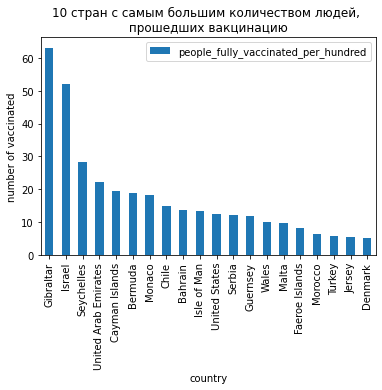

In [276]:
ax = df_total_vaccinations_per_hundred.plot(kind='bar',
                                xlabel='country',
                                ylabel='number of vaccinated',
                                title='10 стран с самым большим количеством людей, \n прошедших вакцинацию ')

<Figure size 648x432 with 0 Axes>

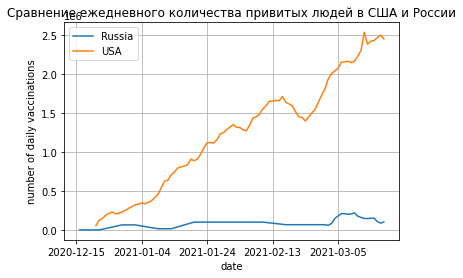

In [277]:
df_daily_Russia = df_covid[ df_covid.country =='Russia' ][['date', 'daily_vaccinations']]
df_daily_Russia = df_daily_Russia.set_index('date')
df_daily_Russia = df_daily_Russia.set_axis(['Russia'], axis=1)

df_daily_USA = df_covid[ df_covid.country == 'United States' ][['date', 'daily_vaccinations']]
df_daily_USA = df_daily_USA.set_index('date')
df_daily_USA = df_daily_USA.set_axis(['USA'], axis=1)

df = df_daily_Russia.join(df_daily_USA, how='outer')

ax = plt.figure(figsize=(9,6))
ax = df.plot(xlabel='date',
            ylabel='number of daily vaccinations',
            title='Сравнение ежедневного количества привитых людей в США и России')

ax.grid(True)


In [278]:
df_sputnik = df_covid[ df_covid.vaccines.str.contains('Sputnik') ]['date'].value_counts()
df_moderna = df_covid[ df_covid.vaccines.str.contains('Moderna') ]['date'].value_counts()
df_v = pd.DataFrame(df_moderna).merge(pd.DataFrame(df_sputnik), left_index = True, right_index = True).head(30)
df_v = df_v.rename(columns={'date_x': 'Moderna', 'date_y': 'Sputnik'})
# не получилось отсортировать по дате :(

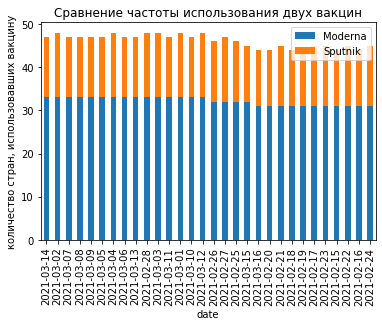

In [279]:
ax = df_v.plot(kind='bar', stacked=True, title='Сравнение частоты использования двух вакцин', xlabel='date', ylabel='количество стран, использовавших вакцину')